In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [2]:
df = pd.read_csv('cambodia_simulations_results_v3.csv')

In [31]:
df.head()

,Unnamed: 0,mc_repetition,simulation_name,duration,household_loss,country_loss,household_loss_KHM,country_loss_VNM,country_loss_THA,country_loss_LAO,country_loss_AFR,country_loss_AME,country_loss_ASI,country_loss_EUR,country_loss_OCE,filename
0,740,0,cascading_and_compound_hazards_consecutive_1,1,2.832875,0.098534,2.832875,0.015065,0.002825,1.383056e-06,0.000064,0.010849,0.006848,0.062706,0.000176,disruption_9858302135_1588051.csv
1,741,1,cascading_and_compound_hazards_consecutive_1,1,2.713913,0.049380,2.713913,0.003103,0.002729,1.256862e-06,0.000054,0.014127,0.019082,0.009870,0.000415,disruption_9858302135_1588051.csv
2,742,2,cascading_and_compound_hazards_consecutive_1,1,2.642201,0.108184,2.642201,0.003648,0.002332,7.888061e-07,0.000174,0.033351,0.016246,0.052115,0.000316,disruption_9858302135_1588051.csv
3,743,3,cascading_and_compound_hazards_consecutive_1,1,2.784614,0.059888,2.784614,0.003000,0.002107,1.548428e-06,0.000246,0.008078,0.032308,0.013963,0.000184,disruption_9858302135_1588051.csv
4,744,4,cascading_and_compound_hazards_consecutive_1,1,2.780484,0.100566,2.780484,0.003333,0.003712,1.088257e-06,0.000056,0.011004,0.006086,0.075398,0.000975,disruption_9858302135_1588051.csv


In [32]:
df.columns.to_list()

['Unnamed: 0',
 'mc_repetition',
 'simulation_name',
 'duration',
 'household_loss',
 'country_loss',
 'household_loss_KHM',
 'country_loss_VNM',
 'country_loss_THA',
 'country_loss_LAO',
 'country_loss_AFR',
 'country_loss_AME',
 'country_loss_ASI',
 'country_loss_EUR',
 'country_loss_OCE',
 'filename']

In [33]:
df['simulation_name'].unique()

array(['cascading_and_compound_hazards_consecutive_1',
       'cascading_and_compound_hazards_consecutive_2',
       'cascading_and_compound_hazards_consecutive_3',
       'cascading_and_compound_hazards_time_lag_long_1',
       'cascading_and_compound_hazards_time_lag_long_2',
       'cascading_and_compound_hazards_time_lag_long_3',
       'cascading_and_compound_hazards_time_lag_short_1',
       'cascading_and_compound_hazards_time_lag_short_2',
       'cascading_and_compound_hazards_time_lag_short_3',
       'cascading_and_compound_hazards_time_lag_very_long_1',
       'cascading_and_compound_hazards_time_lag_very_long_2',
       'cascading_and_compound_hazards_time_lag_very_long_3',
       'cascading_hazards_consecutive_1',
       'cascading_hazards_consecutive_2',
       'cascading_hazards_time_lag_long_1',
       'cascading_hazards_time_lag_long_2',
       'cascading_hazards_time_lag_short_1',
       'cascading_hazards_time_lag_short_2', 'saigon_tonle_sap',
       'simultaneous_d

In [3]:
def clean_scenario_name(scenario):
    return scenario.replace('_', ' ').title()

def get_scenario_colors():
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
              '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    return {scenario: colors[i % len(colors)] for i, scenario in enumerate(sorted(df['simulation_name'].unique()))}

In [4]:
scenarios = sorted(df['simulation_name'].unique())
durations = sorted(df['duration'].unique())
scenario_colors = get_scenario_colors()

In [5]:
# Box plots for each scenario
for scenario in scenarios:
    scenario_data = df[df['simulation_name'] == scenario]
    
    fig = px.box(
        scenario_data, 
        x='duration', 
        y='household_loss',
        title=clean_scenario_name(scenario),
        labels={'household_loss': 'Household Loss (Million USD)', 'duration': 'Duration (days)'}
    )
    
    fig.update_layout(
        height=400,
        font=dict(size=12),
        showlegend=False
    )
    
    fig.update_xaxes(type='category')
    fig.show()

In [6]:
# Summary statistics by scenario and duration
for scenario in scenarios:
    scenario_data = df[df['simulation_name'] == scenario]
    
    print(f"\n{clean_scenario_name(scenario)}")
    stats = scenario_data.groupby('duration')['household_loss'].agg(['mean', 'std', 'min', 'max', 'median']).round(2)
    stats['cv'] = (stats['std'] / stats['mean']).round(3)
    print(stats)


Cascading Hazards 0D
            mean   std    min     max  median     cv
duration                                            
1           2.96  0.06   2.89    3.10    2.96  0.020
3           9.61  0.18   9.38    9.96    9.64  0.019
7          27.32  0.43  26.36   27.81   27.44  0.016
14        109.38  6.17  98.50  118.22  108.14  0.056

Cascading Hazards 1D
            mean   std     min     max  median     cv
duration                                             
1           2.72  0.05    2.64    2.79    2.73  0.018
3           8.91  0.21    8.53    9.27    8.90  0.024
7          29.35  1.27   27.92   32.05   29.19  0.043
14        134.40  4.53  126.59  143.70  134.06  0.034

Cascading Hazards 2D
            mean    std     min     max  median     cv
duration                                              
1           2.71   0.03    2.65    2.75    2.71  0.011
3           8.95   0.14    8.75    9.13    8.93  0.016
7          31.10   5.30   25.58   44.10   29.21  0.170
14        135.60 

In [38]:
df_day = df[df['duration'] == 3]

# Scenario groupings
single_scenarios = ['single_basin_saigon', 'single_basin_mekong', 'single_basin_tonle_sap']
double_scenarios = ['saigon_tonle_sap', 'single_basin_mekong']

# Mean losses
simultaneous_loss = df_day[df_day['simulation_name'] == 'simultaneous_disruptions']['household_loss'].mean()
saigon_loss = df_day[df_day['simulation_name'] == 'single_basin_saigon']['household_loss'].mean()
mekong_loss = df_day[df_day['simulation_name'] == 'single_basin_mekong']['household_loss'].mean()
tonle_sap_loss = df_day[df_day['simulation_name'] == 'single_basin_tonle_sap']['household_loss'].mean()
saigon_tonle_sap_loss = df_day[df_day['simulation_name'] == 'saigon_tonle_sap']['household_loss'].mean()

# Aggregate losses
single_basins_sum = df_day[df_day['simulation_name'].isin(single_scenarios)].groupby('simulation_name')['household_loss'].mean().sum()
double_basins_sum = df_day[df_day['simulation_name'].isin(double_scenarios)].groupby('simulation_name')['household_loss'].mean().sum()

# Print
print("=== SCENARIO LOSSES 3 days ===")
print(f"All three: {simultaneous_loss:.1f}M USD")
print(f"Saigon: {saigon_loss:.1f}M | Mekong: {mekong_loss:.1f}M | Tonle Sap: {tonle_sap_loss:.1f}M")
print(f"Saigon + Mekong + Tonle Sap: {single_basins_sum:.1f}M USD ({((single_basins_sum - simultaneous_loss) / single_basins_sum) * 100:+.1f}%)")
print(f"Saigon & Tonle Sap: {saigon_tonle_sap_loss:.1f}M USD")
print(f"Saigon & Tonle Sap + Mekong: {double_basins_sum:.1f}M USD ({((double_basins_sum - simultaneous_loss) / double_basins_sum) * 100:+.1f}%)")

=== SCENARIO LOSSES 3 days ===
All three: 9.5M USD
Saigon: 1.7M | Mekong: 6.5M | Tonle Sap: 1.2M
Saigon + Mekong + Tonle Sap: 9.4M USD (-1.1%)
Saigon & Tonle Sap: 2.8M USD
Saigon & Tonle Sap + Mekong: 9.3M USD (-1.7%)


In [10]:
df_day = df[df['duration'] == 7]

# Scenario groupings
single_scenarios = ['single_basin_saigon', 'single_basin_mekong', 'single_basin_tonle_sap']
double_scenarios = ['saigon_tonle_sap', 'single_basin_mekong']

# Mean losses
simultaneous_loss = df_day[df_day['simulation_name'] == 'simultaneous_disruptions']['household_loss'].mean()
saigon_loss = df_day[df_day['simulation_name'] == 'single_basin_saigon']['household_loss'].mean()
mekong_loss = df_day[df_day['simulation_name'] == 'single_basin_mekong']['household_loss'].mean()
tonle_sap_loss = df_day[df_day['simulation_name'] == 'single_basin_tonle_sap']['household_loss'].mean()
saigon_tonle_sap_loss = df_day[df_day['simulation_name'] == 'saigon_tonle_sap']['household_loss'].mean()

# Aggregate losses
single_basins_sum = df_day[df_day['simulation_name'].isin(single_scenarios)].groupby('simulation_name')['household_loss'].mean().sum()
double_basins_sum = df_day[df_day['simulation_name'].isin(double_scenarios)].groupby('simulation_name')['household_loss'].mean().sum()

# Print
print("=== SCENARIO LOSSES 7 days ===")
print(f"All three: {simultaneous_loss:.1f}M USD")
print(f"Saigon: {saigon_loss:.1f}M | Mekong: {mekong_loss:.1f}M | Tonle Sap: {tonle_sap_loss:.1f}M")
print(f"Saigon + Mekong + Tonle Sap: {single_basins_sum:.1f}M USD ({((single_basins_sum - simultaneous_loss) / single_basins_sum) * 100:+.1f}%)")
print(f"Saigon & Tonle Sap: {saigon_tonle_sap_loss:.1f}M USD")
print(f"Saigon & Tonle Sap + Mekong: {double_basins_sum:.1f}M USD ({((double_basins_sum - simultaneous_loss) / double_basins_sum) * 100:+.1f}%)")

=== SCENARIO LOSSES 7 days ===
All three: 27.6M USD
Saigon: 5.3M | Mekong: 19.5M | Tonle Sap: 3.7M
Saigon + Mekong + Tonle Sap: 28.5M USD (+3.3%)
Saigon & Tonle Sap: 8.1M USD
Saigon & Tonle Sap + Mekong: 27.6M USD (+0.1%)


In [11]:
df_day = df[df['duration'] == 14]

# Scenario groupings
single_scenarios = ['single_basin_saigon', 'single_basin_mekong', 'single_basin_tonle_sap']
double_scenarios = ['saigon_tonle_sap', 'single_basin_mekong']

# Mean losses
simultaneous_loss = df_day[df_day['simulation_name'] == 'simultaneous_disruptions']['household_loss'].mean()
saigon_loss = df_day[df_day['simulation_name'] == 'single_basin_saigon']['household_loss'].mean()
mekong_loss = df_day[df_day['simulation_name'] == 'single_basin_mekong']['household_loss'].mean()
tonle_sap_loss = df_day[df_day['simulation_name'] == 'single_basin_tonle_sap']['household_loss'].mean()
saigon_tonle_sap_loss = df_day[df_day['simulation_name'] == 'saigon_tonle_sap']['household_loss'].mean()

# Aggregate losses
single_basins_sum = df_day[df_day['simulation_name'].isin(single_scenarios)].groupby('simulation_name')['household_loss'].mean().sum()
double_basins_sum = df_day[df_day['simulation_name'].isin(double_scenarios)].groupby('simulation_name')['household_loss'].mean().sum()

# Print
print("=== SCENARIO LOSSES 14 days ===")
print(f"All three: {simultaneous_loss:.1f}M USD")
print(f"Saigon: {saigon_loss:.1f}M | Mekong: {mekong_loss:.1f}M | Tonle Sap: {tonle_sap_loss:.1f}M")
print(f"Saigon + Mekong + Tonle Sap: {single_basins_sum:.1f}M USD ({((single_basins_sum - simultaneous_loss) / single_basins_sum) * 100:+.1f}%)")
print(f"Saigon & Tonle Sap: {saigon_tonle_sap_loss:.1f}M USD")
print(f"Saigon & Tonle Sap + Mekong: {double_basins_sum:.1f}M USD ({((double_basins_sum - simultaneous_loss) / double_basins_sum) * 100:+.1f}%)")

=== SCENARIO LOSSES 14 days ===
All three: 117.5M USD
Saigon: 68.8M | Mekong: 100.3M | Tonle Sap: 44.2M
Saigon + Mekong + Tonle Sap: 213.3M USD (+44.9%)
Saigon & Tonle Sap: 80.6M USD
Saigon & Tonle Sap + Mekong: 180.9M USD (+35.0%)


In [40]:
df_day = df[df['duration'] == 21]

# Scenario groupings
single_scenarios = ['single_basin_saigon', 'single_basin_mekong', 'single_basin_tonle_sap']
double_scenarios = ['saigon_tonle_sap', 'single_basin_mekong']

# Mean losses
simultaneous_loss = df_day[df_day['simulation_name'] == 'simultaneous_disruptions']['household_loss'].mean()
saigon_loss = df_day[df_day['simulation_name'] == 'single_basin_saigon']['household_loss'].mean()
mekong_loss = df_day[df_day['simulation_name'] == 'single_basin_mekong']['household_loss'].mean()
tonle_sap_loss = df_day[df_day['simulation_name'] == 'single_basin_tonle_sap']['household_loss'].mean()
saigon_tonle_sap_loss = df_day[df_day['simulation_name'] == 'saigon_tonle_sap']['household_loss'].mean()

# Aggregate losses
single_basins_sum = df_day[df_day['simulation_name'].isin(single_scenarios)].groupby('simulation_name')['household_loss'].mean().sum()
double_basins_sum = df_day[df_day['simulation_name'].isin(double_scenarios)].groupby('simulation_name')['household_loss'].mean().sum()

# Print
print("=== SCENARIO LOSSES 21 days ===")
print(f"All three: {simultaneous_loss:.1f}M USD")
print(f"Saigon: {saigon_loss:.1f}M | Mekong: {mekong_loss:.1f}M | Tonle Sap: {tonle_sap_loss:.1f}M")
print(f"Saigon + Mekong + Tonle Sap: {single_basins_sum:.1f}M USD ({((single_basins_sum - simultaneous_loss) / single_basins_sum) * 100:+.1f}%)")
print(f"Saigon & Tonle Sap: {saigon_tonle_sap_loss:.1f}M USD")
print(f"Saigon & Tonle Sap + Mekong: {double_basins_sum:.1f}M USD ({((double_basins_sum - simultaneous_loss) / double_basins_sum) * 100:+.1f}%)")

=== SCENARIO LOSSES 21 days ===
All three: 239.2M USD
Saigon: 181.9M | Mekong: 217.2M | Tonle Sap: 151.9M
Saigon + Mekong + Tonle Sap: 551.1M USD (+56.6%)
Saigon & Tonle Sap: 186.6M USD
Saigon & Tonle Sap + Mekong: 403.8M USD (+40.8%)


In [12]:
df_day = df[df['duration'] == 28]

# Scenario groupings
single_scenarios = ['single_basin_saigon', 'single_basin_mekong', 'single_basin_tonle_sap']
double_scenarios = ['saigon_tonle_sap', 'single_basin_mekong']

# Mean losses
simultaneous_loss = df_day[df_day['simulation_name'] == 'simultaneous_disruptions']['household_loss'].mean()
saigon_loss = df_day[df_day['simulation_name'] == 'single_basin_saigon']['household_loss'].mean()
mekong_loss = df_day[df_day['simulation_name'] == 'single_basin_mekong']['household_loss'].mean()
tonle_sap_loss = df_day[df_day['simulation_name'] == 'single_basin_tonle_sap']['household_loss'].mean()
saigon_tonle_sap_loss = df_day[df_day['simulation_name'] == 'saigon_tonle_sap']['household_loss'].mean()

# Aggregate losses
single_basins_sum = df_day[df_day['simulation_name'].isin(single_scenarios)].groupby('simulation_name')['household_loss'].mean().sum()
double_basins_sum = df_day[df_day['simulation_name'].isin(double_scenarios)].groupby('simulation_name')['household_loss'].mean().sum()

# Print
print("=== SCENARIO LOSSES 28 days ===")
print(f"All three: {simultaneous_loss:.1f}M USD")
print(f"Saigon: {saigon_loss:.1f}M | Mekong: {mekong_loss:.1f}M | Tonle Sap: {tonle_sap_loss:.1f}M")
print(f"Saigon + Mekong + Tonle Sap: {single_basins_sum:.1f}M USD ({((single_basins_sum - simultaneous_loss) / single_basins_sum) * 100:+.1f}%)")
print(f"Saigon & Tonle Sap: {saigon_tonle_sap_loss:.1f}M USD")
print(f"Saigon & Tonle Sap + Mekong: {double_basins_sum:.1f}M USD ({((double_basins_sum - simultaneous_loss) / double_basins_sum) * 100:+.1f}%)")

=== SCENARIO LOSSES 28 days ===
All three: 337.8M USD
Saigon: 230.8M | Mekong: 303.0M | Tonle Sap: 202.3M
Saigon + Mekong + Tonle Sap: 736.1M USD (+54.1%)
Saigon & Tonle Sap: 257.5M USD
Saigon & Tonle Sap + Mekong: 560.5M USD (+39.7%)


In [13]:
df_day = df[df['duration'] == 7]

# Mean losses
simultaneous_loss = df_day[df_day['simulation_name'] == 'simultaneous_disruptions']['household_loss'].mean()
cascading_consecutive_1 = df_day[df_day['simulation_name'] == 'cascading_hazards_consecutive_1']['household_loss'].mean()
cascading_short_1 = df_day[df_day['simulation_name'] == 'cascading_hazards_time_lag_short_1']['household_loss'].mean()
cascading_long_1 = df_day[df_day['simulation_name'] == 'cascading_hazards_time_lag_long_1']['household_loss'].mean()

print("=== SCENARIO LOSSES 7 days ===")
print("CASCADING HAZARDS")
print(f"Simultaneous: {simultaneous_loss:.1f}M USD")
print(f"Three basins, consecutive disruption: {cascading_consecutive_1:.1f}M USD ({((cascading_consecutive_1 - simultaneous_loss) / simultaneous_loss) * 100:+.1f}%)")
print(f"Three basins, 3 days disruption lag: {cascading_short_1:.1f}M USD ({((cascading_short_1 - simultaneous_loss) / simultaneous_loss) * 100:+.1f}%)")
print(f"Three basins, 7 days disruption lag: {cascading_long_1:.1f}M USD ({((cascading_long_1 - simultaneous_loss) / simultaneous_loss) * 100:+.1f}%)")

compound_scenarios = [
    'cascading_and_compound_hazards_consecutive_1',
    'cascading_and_compound_hazards_time_lag_long_1',
    'cascading_and_compound_hazards_time_lag_short_1',
    'cascading_and_compound_hazards_time_lag_very_long_1'
]

print("COMPOUND HAZARDS")
print(f"Simultaneous: {simultaneous_loss:.1f}M USD")
for scenario in compound_scenarios:
    scenario_loss = df_day[df_day['simulation_name'] == scenario]['household_loss'].mean()
    percentage = ((scenario_loss - simultaneous_loss) / simultaneous_loss) * 100
    scenario_short = scenario.replace('cascading_and_compound_hazards_', '')
    print(f"{scenario_short}: {scenario_loss:.1f}M USD ({percentage:+.1f}%)")
    
    
compound_scenarios = [
    'cascading_and_compound_hazards_consecutive_3',
    'cascading_and_compound_hazards_time_lag_long_3',
    'cascading_and_compound_hazards_time_lag_short_3',
    'cascading_and_compound_hazards_time_lag_very_long_3'
]

print(f"Simultaneous: {simultaneous_loss:.1f}M USD")
for scenario in compound_scenarios:
    scenario_loss = df_day[df_day['simulation_name'] == scenario]['household_loss'].mean()
    percentage = ((scenario_loss - simultaneous_loss) / simultaneous_loss) * 100
    scenario_short = scenario.replace('cascading_and_compound_hazards_', '')
    print(f"{scenario_short}: {scenario_loss:.1f}M USD ({percentage:+.1f}%)")

=== SCENARIO LOSSES 7 days ===
CASCADING HAZARDS
Simultaneous: 27.6M USD
Three basins, consecutive disruption: 29.8M USD (+8.0%)
Three basins, 3 days disruption lag: 32.8M USD (+19.0%)
Three basins, 7 days disruption lag: 98.3M USD (+256.3%)
COMPOUND HAZARDS
Simultaneous: 27.6M USD
consecutive_1: 30.7M USD (+11.1%)
time_lag_long_1: 49.6M USD (+79.8%)
time_lag_short_1: 30.7M USD (+11.1%)
time_lag_very_long_1: 44.3M USD (+60.4%)
Simultaneous: 27.6M USD
consecutive_3: 30.1M USD (+9.0%)
time_lag_long_3: 53.9M USD (+95.2%)
time_lag_short_3: 31.3M USD (+13.2%)
time_lag_very_long_3: 45.5M USD (+64.9%)


In [14]:
df_day = df[df['duration'] == 14]

# Mean losses
simultaneous_loss = df_day[df_day['simulation_name'] == 'simultaneous_disruptions']['household_loss'].mean()
cascading_consecutive_1 = df_day[df_day['simulation_name'] == 'cascading_hazards_consecutive_1']['household_loss'].mean()
cascading_short_1 = df_day[df_day['simulation_name'] == 'cascading_hazards_time_lag_short_1']['household_loss'].mean()
cascading_long_1 = df_day[df_day['simulation_name'] == 'cascading_hazards_time_lag_long_1']['household_loss'].mean()

print("=== SCENARIO LOSSES 14 days ===")
print("CASCADING HAZARDS")
print(f"Simultaneous: {simultaneous_loss:.1f}M USD")
print(f"Three basins, consecutive disruption: {cascading_consecutive_1:.1f}M USD ({((cascading_consecutive_1 - simultaneous_loss) / simultaneous_loss) * 100:+.1f}%)")
print(f"Three basins, 3 days disruption lag: {cascading_short_1:.1f}M USD ({((cascading_short_1 - simultaneous_loss) / simultaneous_loss) * 100:+.1f}%)")
print(f"Three basins, 7 days disruption lag: {cascading_long_1:.1f}M USD ({((cascading_long_1 - simultaneous_loss) / simultaneous_loss) * 100:+.1f}%)")

compound_scenarios = [
    'cascading_and_compound_hazards_consecutive_1',
    'cascading_and_compound_hazards_time_lag_long_1',
    'cascading_and_compound_hazards_time_lag_short_1',
    'cascading_and_compound_hazards_time_lag_very_long_1'
]

print("COMPOUND HAZARDS")
print(f"Simultaneous: {simultaneous_loss:.1f}M USD")
for scenario in compound_scenarios:
    scenario_loss = df_day[df_day['simulation_name'] == scenario]['household_loss'].mean()
    percentage = ((scenario_loss - simultaneous_loss) / simultaneous_loss) * 100
    scenario_short = scenario.replace('cascading_and_compound_hazards_', '')
    print(f"{scenario_short}: {scenario_loss:.1f}M USD ({percentage:+.1f}%)")
    
    
compound_scenarios = [
    'cascading_and_compound_hazards_consecutive_3',
    'cascading_and_compound_hazards_time_lag_long_3',
    'cascading_and_compound_hazards_time_lag_short_3',
    'cascading_and_compound_hazards_time_lag_very_long_3'
]

print(f"Simultaneous: {simultaneous_loss:.1f}M USD")
for scenario in compound_scenarios:
    scenario_loss = df_day[df_day['simulation_name'] == scenario]['household_loss'].mean()
    percentage = ((scenario_loss - simultaneous_loss) / simultaneous_loss) * 100
    scenario_short = scenario.replace('cascading_and_compound_hazards_', '')
    print(f"{scenario_short}: {scenario_loss:.1f}M USD ({percentage:+.1f}%)")

=== SCENARIO LOSSES 14 days ===
CASCADING HAZARDS
Simultaneous: 117.5M USD
Three basins, consecutive disruption: 135.1M USD (+15.0%)
Three basins, 3 days disruption lag: 141.7M USD (+20.6%)
Three basins, 7 days disruption lag: 203.4M USD (+73.1%)
COMPOUND HAZARDS
Simultaneous: 117.5M USD
consecutive_1: 133.4M USD (+13.5%)
time_lag_long_1: 174.9M USD (+48.9%)
time_lag_short_1: 134.3M USD (+14.3%)
time_lag_very_long_1: 192.8M USD (+64.1%)
Simultaneous: 117.5M USD
consecutive_3: 137.0M USD (+16.6%)
time_lag_long_3: 179.5M USD (+52.8%)
time_lag_short_3: 133.9M USD (+14.0%)
time_lag_very_long_3: 199.3M USD (+69.6%)


In [16]:
df_day = df[df['duration'] == 28]

# Mean losses
simultaneous_loss = df_day[df_day['simulation_name'] == 'simultaneous_disruptions']['household_loss'].mean()
cascading_consecutive_1 = df_day[df_day['simulation_name'] == 'cascading_hazards_consecutive_1']['household_loss'].mean()
cascading_short_1 = df_day[df_day['simulation_name'] == 'cascading_hazards_time_lag_short_1']['household_loss'].mean()
cascading_long_1 = df_day[df_day['simulation_name'] == 'cascading_hazards_time_lag_long_1']['household_loss'].mean()

print("=== SCENARIO LOSSES 28 days ===")
print("CASCADING HAZARDS")
print(f"Simultaneous: {simultaneous_loss:.1f}M USD")
print(f"Three basins, consecutive disruption: {cascading_consecutive_1:.1f}M USD ({((cascading_consecutive_1 - simultaneous_loss) / simultaneous_loss) * 100:+.1f}%)")
print(f"Three basins, 3 days disruption lag: {cascading_short_1:.1f}M USD ({((cascading_short_1 - simultaneous_loss) / simultaneous_loss) * 100:+.1f}%)")
print(f"Three basins, 7 days disruption lag: {cascading_long_1:.1f}M USD ({((cascading_long_1 - simultaneous_loss) / simultaneous_loss) * 100:+.1f}%)")

compound_scenarios = [
    'cascading_and_compound_hazards_consecutive_1',
    'cascading_and_compound_hazards_time_lag_long_1',
    'cascading_and_compound_hazards_time_lag_short_1',
    'cascading_and_compound_hazards_time_lag_very_long_1'
]

print("COMPOUND HAZARDS")
print(f"Simultaneous: {simultaneous_loss:.1f}M USD")
for scenario in compound_scenarios:
    scenario_loss = df_day[df_day['simulation_name'] == scenario]['household_loss'].mean()
    percentage = ((scenario_loss - simultaneous_loss) / simultaneous_loss) * 100
    scenario_short = scenario.replace('cascading_and_compound_hazards_', '')
    print(f"{scenario_short}: {scenario_loss:.1f}M USD ({percentage:+.1f}%)")
    
    
compound_scenarios = [
    'cascading_and_compound_hazards_consecutive_3',
    'cascading_and_compound_hazards_time_lag_long_3',
    'cascading_and_compound_hazards_time_lag_short_3',
    'cascading_and_compound_hazards_time_lag_very_long_3'
]

print(f"Simultaneous: {simultaneous_loss:.1f}M USD")
for scenario in compound_scenarios:
    scenario_loss = df_day[df_day['simulation_name'] == scenario]['household_loss'].mean()
    percentage = ((scenario_loss - simultaneous_loss) / simultaneous_loss) * 100
    scenario_short = scenario.replace('cascading_and_compound_hazards_', '')
    print(f"{scenario_short}: {scenario_loss:.1f}M USD ({percentage:+.1f}%)")

=== SCENARIO LOSSES 28 days ===
CASCADING HAZARDS
Simultaneous: 337.8M USD
Three basins, consecutive disruption: 356.7M USD (+5.6%)
Three basins, 3 days disruption lag: 331.1M USD (-2.0%)
Three basins, 7 days disruption lag: 318.0M USD (-5.9%)
COMPOUND HAZARDS
Simultaneous: 337.8M USD
consecutive_1: 357.4M USD (+5.8%)
time_lag_long_1: 324.5M USD (-3.9%)
time_lag_short_1: 348.2M USD (+3.1%)
time_lag_very_long_1: 262.3M USD (-22.3%)
Simultaneous: 337.8M USD
consecutive_3: 361.7M USD (+7.1%)
time_lag_long_3: 327.8M USD (-3.0%)
time_lag_short_3: 342.8M USD (+1.5%)
time_lag_very_long_3: 280.5M USD (-17.0%)


In [41]:
# === ALL SIMULATIONS ===

# selected_simulations = [
#     'cascading_and_compound_hazards_consecutive_1',
#     'cascading_and_compound_hazards_consecutive_2',
#     'cascading_and_compound_hazards_consecutive_3',
#     'cascading_and_compound_hazards_time_lag_short_1',
#     'cascading_and_compound_hazards_time_lag_short_2',
#     'cascading_and_compound_hazards_time_lag_short_3',
#     'cascading_and_compound_hazards_time_lag_long_1
#     'cascading_and_compound_hazards_time_lag_long_2',
#     'cascading_and_compound_hazards_time_lag_long_3',
#     'cascading_and_compound_hazards_time_lag_very_long_1',
#     'cascading_and_compound_hazards_time_lag_very_long_2',
#     'cascading_and_compound_hazards_time_lag_very_long_3',
#     'cascading_hazards_consecutive_1',
#     'cascading_hazards_consecutive_2',
#     'cascading_hazards_time_lag_short_1',
#     'cascading_hazards_time_lag_short_2',
#     'cascading_hazards_time_lag_long_1',
#     'cascading_hazards_time_lag_long_2',
#     'simultaneous_disruptions',
#     'saigon_tonle_sap',
#     'single_basin_mekong',
#     'single_basin_saigon',
#     'single_basin_tonle_sap'
# ]

# # === CUSTOM SIMULATIONS ===

# selected_simulations = [
#     'simultaneous_disruptions',
#     'single_basin_mekong',
#     'saigon_tonle_sap',
#     'sum_saigon_tonle_sap_mekong',
#     'cascading_and_compound_hazards_consecutive_3',
#     'cascading_and_compound_hazards_time_lag_short_3',
#     'cascading_and_compound_hazards_time_lag_long_3',
#     'cascading_and_compound_hazards_time_lag_very_long_3'
# ]

# selected_simulations = [
#     'simultaneous_disruptions',
#     'single_basin_mekong',
#     'single_basin_saigon',
#     'single_basin_tonle_sap',
#     'sum_three_single_basins',
#     'cascading_hazards_consecutive_1',
#     'cascading_hazards_time_lag_short_1',
#     'cascading_hazards_time_lag_long_1',
# ]

selected_simulations = [
    'cascading_and_compound_hazards_consecutive_1',
    'cascading_and_compound_hazards_time_lag_short_1',
    'cascading_and_compound_hazards_time_lag_long_1',
    'cascading_hazards_consecutive_1',
    'cascading_hazards_time_lag_short_1',
    'cascading_hazards_time_lag_long_1',
]

# selected_simulations = [
#     'cascading_and_compound_hazards_consecutive_2',
#     'cascading_and_compound_hazards_time_lag_short_2',
#     'cascading_and_compound_hazards_time_lag_long_2',
#     'cascading_hazards_consecutive_2',
#     'cascading_hazards_time_lag_short_2',
#     'cascading_hazards_time_lag_long_2',
# ]

In [42]:
scenarios_to_sum = ['single_basin_mekong', 'saigon_tonle_sap']
new_sim_name = 'sum_saigon_tonle_sap_mekong'

df_subset = df[df['simulation_name'].isin(scenarios_to_sum)]
group_cols = ['mc_repetition', 'duration']

# Sum numeric columns for each (mc_repetition, duration)
df_sum = df_subset.groupby(group_cols, as_index=False).sum(numeric_only=True)
df_sum['simulation_name'] = new_sim_name

# Fill in missing columns with None
for col in df.columns:
    if col not in df_sum.columns:
        df_sum[col] = None

df_sum = df_sum[df.columns]
df = pd.concat([df, df_sum], ignore_index=True)

In [43]:
scenarios_to_sum = ['single_basin_mekong', 'single_basin_saigon', 'single_basin_tonle_sap']
new_sim_name = 'sum_three_single_basins'

df_subset = df[df['simulation_name'].isin(scenarios_to_sum)]
group_cols = ['mc_repetition', 'duration']

# Sum numeric columns for each (mc_repetition, duration)
df_sum = df_subset.groupby(group_cols, as_index=False).sum(numeric_only=True)
df_sum['simulation_name'] = new_sim_name

# Fill in missing columns with None
for col in df.columns:
    if col not in df_sum.columns:
        df_sum[col] = None

df_sum = df_sum[df.columns]
df = pd.concat([df, df_sum], ignore_index=True)

In [44]:
df['simulation_name'].unique()

array(['cascading_and_compound_hazards_consecutive_1',
       'cascading_and_compound_hazards_consecutive_2',
       'cascading_and_compound_hazards_consecutive_3',
       'cascading_and_compound_hazards_time_lag_long_1',
       'cascading_and_compound_hazards_time_lag_long_2',
       'cascading_and_compound_hazards_time_lag_long_3',
       'cascading_and_compound_hazards_time_lag_short_1',
       'cascading_and_compound_hazards_time_lag_short_2',
       'cascading_and_compound_hazards_time_lag_short_3',
       'cascading_and_compound_hazards_time_lag_very_long_1',
       'cascading_and_compound_hazards_time_lag_very_long_2',
       'cascading_and_compound_hazards_time_lag_very_long_3',
       'cascading_hazards_consecutive_1',
       'cascading_hazards_consecutive_2',
       'cascading_hazards_time_lag_long_1',
       'cascading_hazards_time_lag_long_2',
       'cascading_hazards_time_lag_short_1',
       'cascading_hazards_time_lag_short_2', 'saigon_tonle_sap',
       'simultaneous_d

In [45]:
show_all_simulations = False

In [46]:
if show_all_simulations:
    print("Showing all available simulations")
    scenarios_to_plot = df['simulation_name'].unique()
else:
    # Filter to only selected simulations that exist in the data
    available_simulations = df['simulation_name'].unique()
    scenarios_to_plot = [s for s in selected_simulations if s in available_simulations]
    missing_simulations = [s for s in selected_simulations if s not in available_simulations]
    
    if missing_simulations:
        print(f"Warning: The following selected simulations were not found in the data: {missing_simulations}")
    
    df = df[df['simulation_name'].isin(scenarios_to_plot)]
    print(f"Selected {len(scenarios_to_plot)} simulations to plot")

print(f"Data loaded: {len(df)} records, {len(df['simulation_name'].unique())} scenarios")
print(f"Available simulations: {sorted(df['simulation_name'].unique())}")

scenarios = sorted(df['simulation_name'].unique())
durations = sorted(df['duration'].unique())
scenario_colors = get_scenario_colors()

Selected 6 simulations to plot
Data loaded: 360 records, 6 scenarios
Available simulations: ['cascading_and_compound_hazards_consecutive_1', 'cascading_and_compound_hazards_time_lag_long_1', 'cascading_and_compound_hazards_time_lag_short_1', 'cascading_hazards_consecutive_1', 'cascading_hazards_time_lag_long_1', 'cascading_hazards_time_lag_short_1']


In [7]:
stats_df = df.groupby(['simulation_name', 'duration'])['household_loss'].agg(['mean', 'std']).reset_index()

fig = go.Figure()

for scenario in scenarios:
    scenario_data = stats_df[stats_df['simulation_name'] == scenario]
    
    fig.add_trace(go.Scatter(
        x=scenario_data['duration'],
        y=scenario_data['mean'],
        error_y=dict(type='data', array=scenario_data['std'], visible=True),
        mode='lines+markers',
        name=clean_scenario_name(scenario),
        line=dict(width=2),
        marker=dict(size=6)
    ))

y_min, y_max = stats_df['mean'].min(), stats_df['mean'].max()
padding = 0.1 * (y_max - y_min)

fig.update_layout(
    title='Households loss (duration)',
    width=1000,
    height=800,
    xaxis=dict(
        title=dict(text='Duration (days)', font=dict(size=14)),
        tickfont=dict(size=12),
        range=[0, 30]
    ),
    yaxis=dict(
        title=dict(text='Household Loss (Million USD)', font=dict(size=14)),
        tickfont=dict(size=12),
        range=[max(0, y_min - padding), y_max + padding]
    ),
    template='plotly_white',
    legend=dict(font=dict(size=11))
)

fig.show()

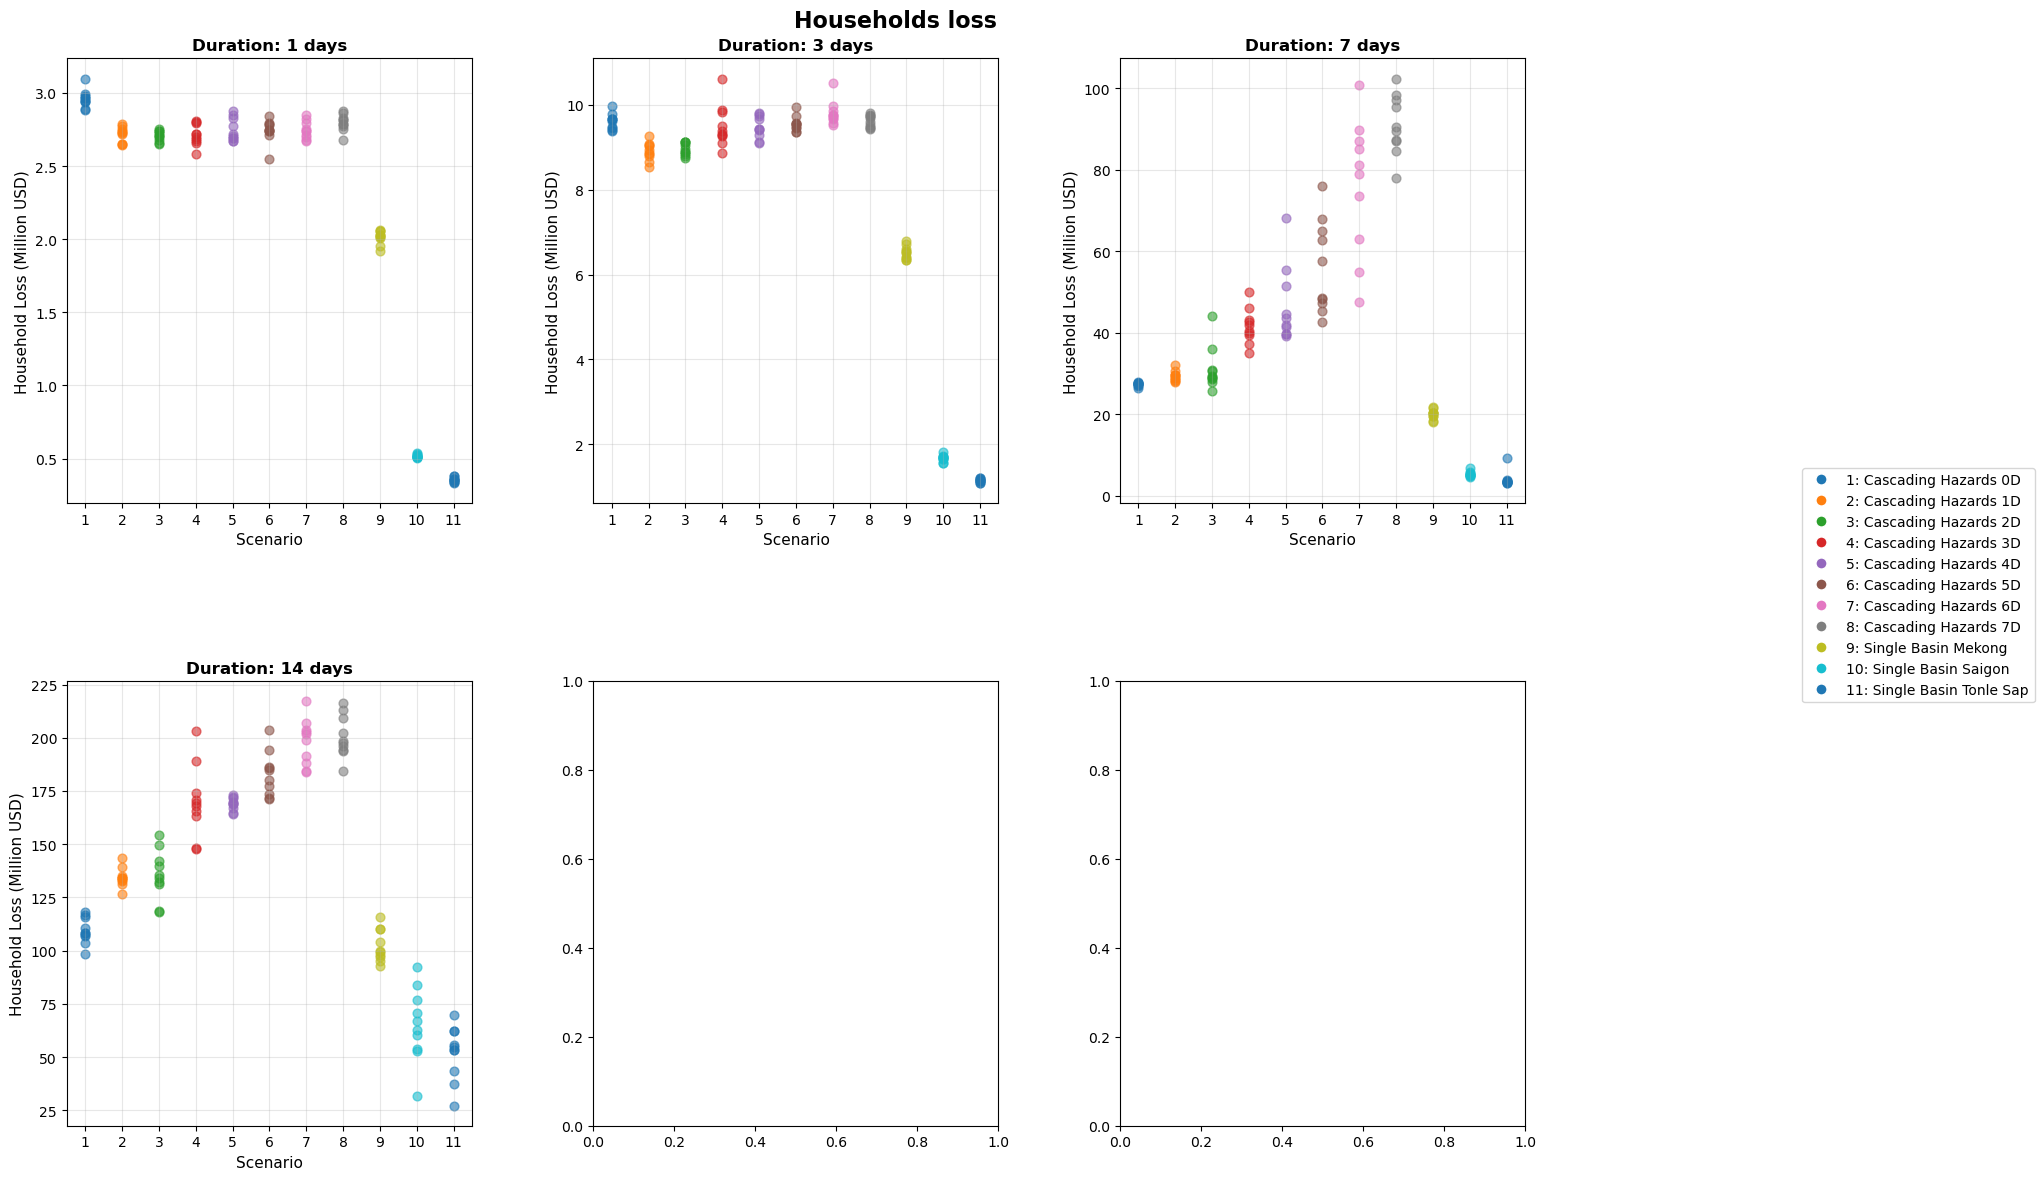

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Households loss', fontsize=16, fontweight='bold')
axes = axes.flatten()

for i, duration in enumerate(durations):
    ax = axes[i]
    duration_data = df[df['duration'] == duration]
    
    for j, scenario in enumerate(scenarios):
        scenario_data = duration_data[duration_data['simulation_name'] == scenario]
        if not scenario_data.empty:
            ax.scatter(
                [j] * len(scenario_data), 
                scenario_data['household_loss'],
                alpha=0.6, 
                s=40,
                color=scenario_colors[scenario]
            )
    
    ax.set_title(f'Duration: {duration} days', fontsize=12, fontweight='bold')
    ax.set_ylabel('Household Loss (Million USD)', fontsize=11)
    ax.set_xlabel('Scenario', fontsize=11)
    ax.set_xticks(range(len(scenarios)))
    ax.set_xticklabels([str(i+1) for i in range(len(scenarios))], fontsize=10)
    ax.grid(True, alpha=0.3)

# Create legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scenario_colors[scenario],
                              markersize=8, label=f"{i+1}: {clean_scenario_name(scenario)}")
                   for i, scenario in enumerate(scenarios)]
fig.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)

plt.tight_layout()
plt.subplots_adjust(right=0.85, hspace=0.4, wspace=0.3)
plt.show()

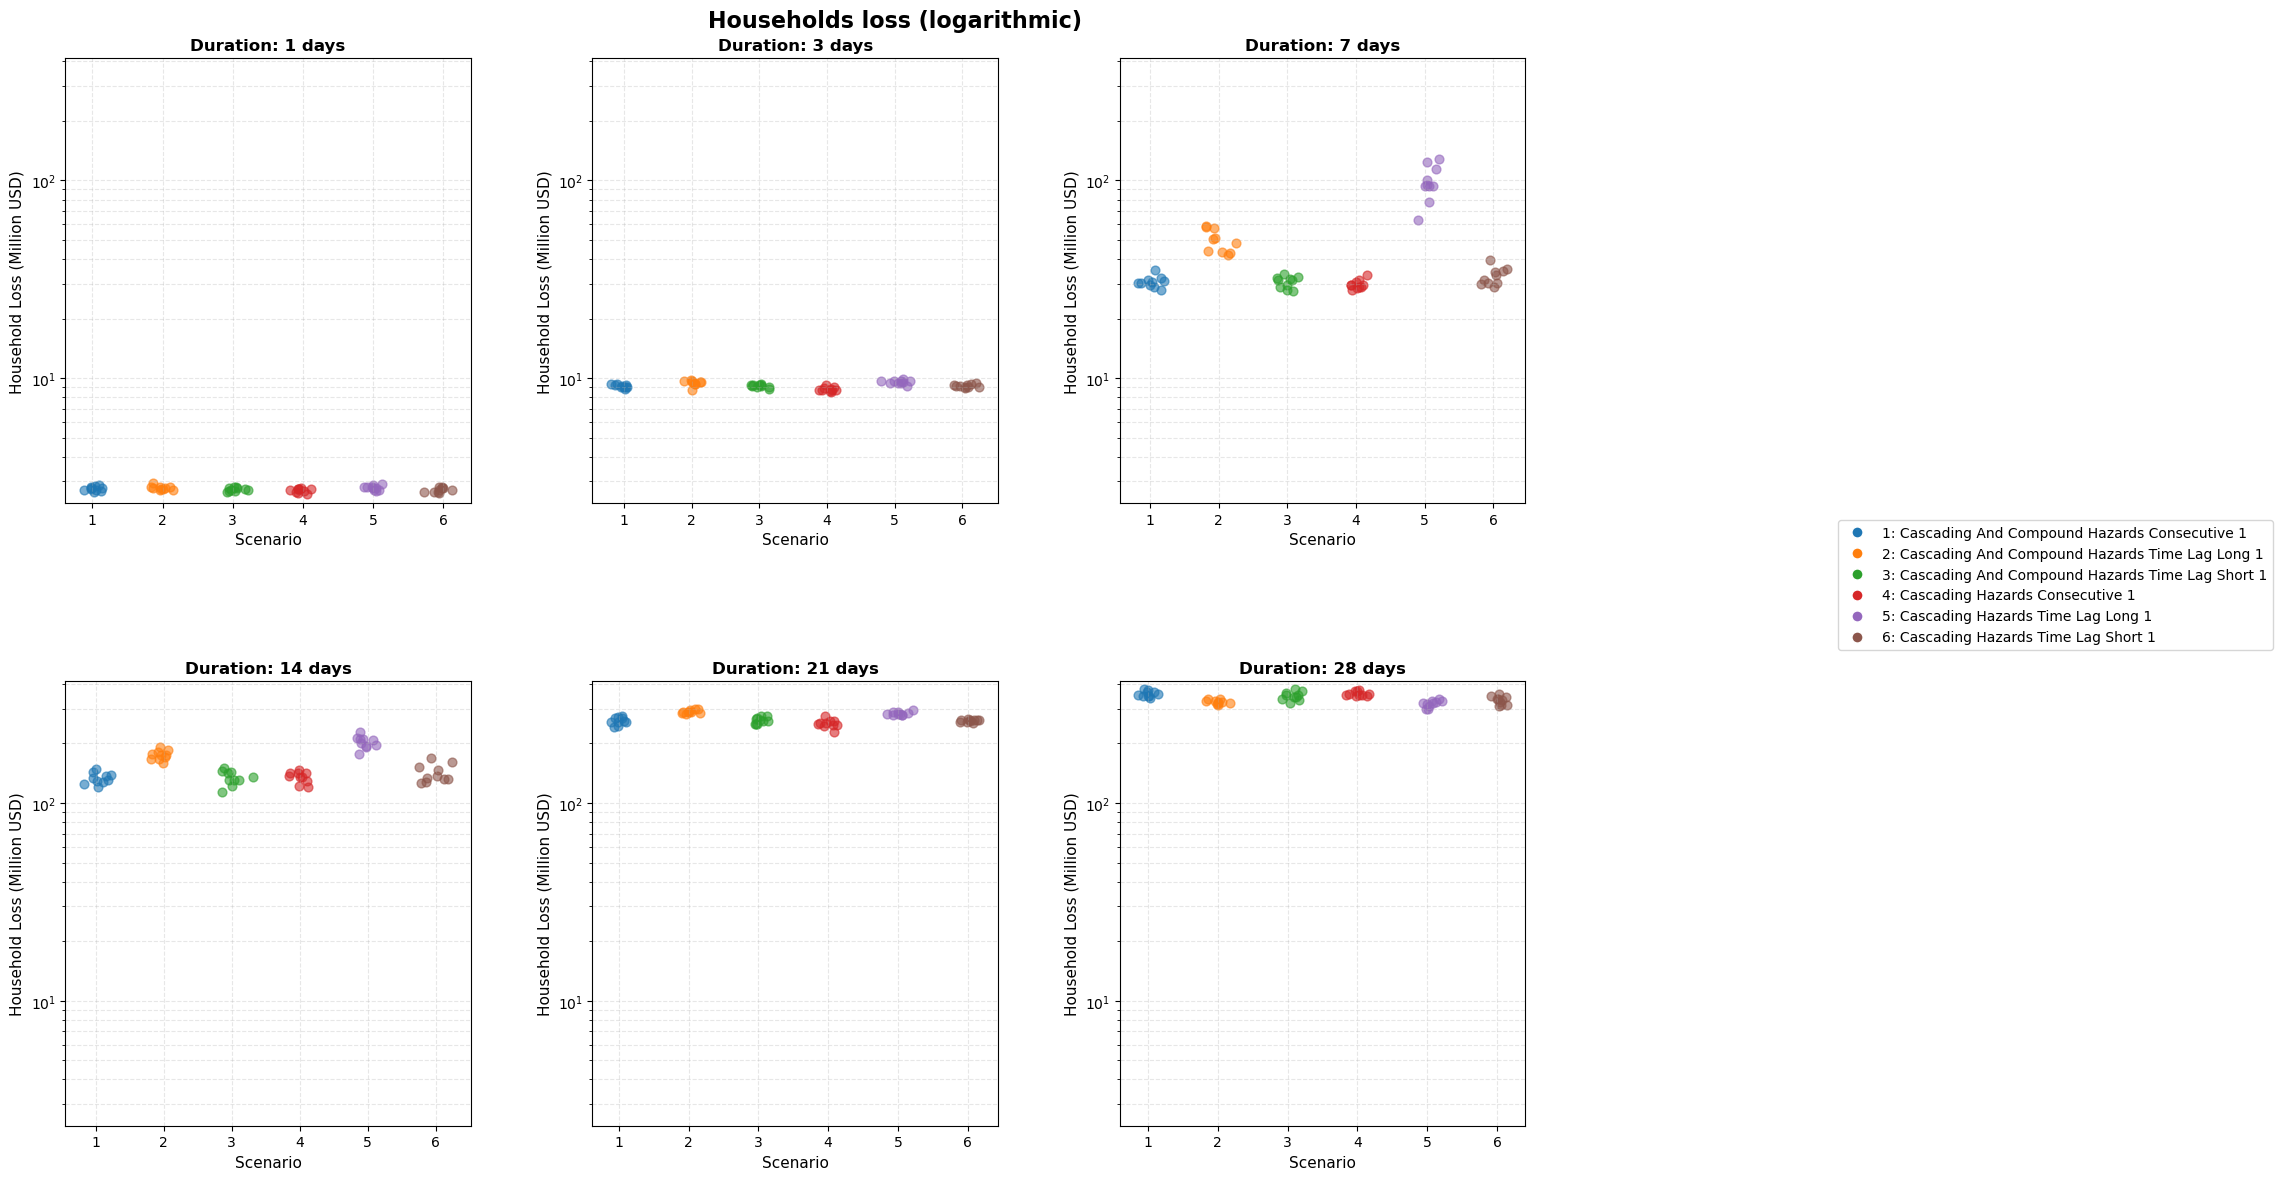

In [49]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Households loss (logarithmic)', fontsize=16, fontweight='bold')
axes = axes.flatten()

# Calculate global y-axis limits for consistent scaling
all_losses = df['household_loss'].values
y_min_global = np.min(all_losses)
y_max_global = np.max(all_losses)

for i, duration in enumerate(durations):
    ax = axes[i]
    duration_data = df[df['duration'] == duration]
    
    for j, scenario in enumerate(scenarios):
        scenario_data = duration_data[duration_data['simulation_name'] == scenario]
        if not scenario_data.empty:
            # Add small jitter to x-axis for better visibility
            x_vals = np.random.normal(j, 0.1, size=len(scenario_data))
            ax.scatter(
                x_vals, 
                scenario_data['household_loss'], 
                alpha=0.6, 
                s=40,
                color=scenario_colors[scenario]
            )
    
    ax.set_title(f'Duration: {duration} days', fontsize=12, fontweight='bold')
    ax.set_ylabel('Household Loss (Million USD)', fontsize=11)
    ax.set_xlabel('Scenario', fontsize=11)
    ax.set_yscale('log')
    ax.set_ylim(y_min_global * 0.9, y_max_global * 1.1)  # Set consistent y-axis limits
    ax.set_xticks(range(len(scenarios)))
    ax.set_xticklabels([str(i+1) for i in range(len(scenarios))], fontsize=10)
    ax.grid(True, alpha=0.3, which='both', linestyle='--')

# Create legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scenario_colors[scenario], 
                              markersize=8, label=f"{i+1}: {clean_scenario_name(scenario)}")
                   for i, scenario in enumerate(scenarios)]
fig.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1.02, 0.5), fontsize=10)

plt.tight_layout()
plt.subplots_adjust(right=0.85, hspace=0.4, wspace=0.3)
plt.show()

In [ ]:
stats_df = df.groupby(['simulation_name', 'duration', 'time_lag'])['household_loss'].agg(['mean', 'std']).reset_index()

fig = go.Figure()

for duration in sorted(stats_df['duration'].unique()):
    duration_data = stats_df[stats_df['duration'] == duration].sort_values('time_lag')
    fig.add_trace(go.Scatter(
        x=duration_data['time_lag'],
        y=duration_data['mean'],
        error_y=dict(type='data', array=duration_data['std'], visible=True),
        mode='lines+markers',
        name=f'{duration}-day disruption',
        line=dict(width=2),
        marker=dict(size=6)
    ))

y_min, y_max = stats_df['mean'].min(), stats_df['mean'].max()
padding = 0.1 * (y_max - y_min)

fig.update_layout(
    title='Household Loss vs Time Lag by Disruption Duration',
    width=1000,
    height=800,
    xaxis=dict(
        title=dict(text='Time Lag Between Disruptions (days)', font=dict(size=14)),
        tickfont=dict(size=12),
        tickmode='linear',
        dtick=1
    ),
    yaxis=dict(
        title=dict(text='Average Household Loss (Million USD)', font=dict(size=14)),
        tickfont=dict(size=12),
        range=[max(0, y_min - padding), y_max + padding]
    ),
    template='plotly_white',
    legend=dict(title='Disruption Duration', font=dict(size=12))
)

fig.show()